In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# Modeling One nueron with n number of inputs

In [2]:
# modeling with one nueron and three inputs
inputs=[1.2,5.1,2.1]
weights=[3.1,2.1,8.7]
bias=3

output=inputs[0]*weights[0]+inputs[1]*weights[1]+inputs[2]*weights[2]+bias
output

35.7

In [3]:
inputs=[1,2,3]
weights=[0.2,0.8,-0.5]
bias=2

output=inputs[0]*weights[0]+inputs[1]*weights[1]+inputs[2]*weights[2]+bias
output

2.3

In [4]:
# modeling with one nueron and four inputs
inputs=[1,2,3,2.5]
weights=[0.2,0.8,-0.5,1]
bias=2

output=inputs[0]*weights[0]+inputs[1]*weights[1]+inputs[2]*weights[2]+inputs[3]*weights[3]+bias
output

4.8

# modeling 3 nuerons with four inputs

In [5]:
# modeling with one nueron and four inputs
inputs=[1,2,3,2.5]
weights1=[0.2,0.8,-0.5,1]
weights2=[0.5,-0.91,0.26,-0.5]
weights3=[-0.26,-0.27,0.17,0.87]
bias1=2
bias2=3
bias3=0.5

output=[inputs[0]*weights1[0]+inputs[1]*weights1[1]+inputs[2]*weights1[2]+inputs[3]*weights1[3]+bias1,
        inputs[0]*weights2[0]+inputs[1]*weights2[1]+inputs[2]*weights2[2]+inputs[3]*weights2[3]+bias2,
        inputs[0]*weights3[0]+inputs[1]*weights3[1]+inputs[2]*weights3[2]+inputs[3]*weights3[3]+bias3]
output

[4.8, 1.21, 2.385]

# tuning the weights and bias is very necessary which we will see later

In [6]:
inputs=[1,2,3,2.5]
weights=[[0.2,0.8,-0.5,1],[0.5,-0.91,0.26,-0.5],[-0.26,-0.27,0.17,0.87]]
bias=[2,3,0.5]

outputs=[]
for nueron_weights,nueron_bias in zip(weights,bias):
    output=0
    for input,weight in zip(inputs,nueron_weights):
        output+=input*weight
    output+=nueron_bias
    outputs.append(output)
print(outputs)

[4.8, 1.21, 2.385]


* coverting this calculation to numpy

In [7]:
inputs=[1,2,3,2.5]
weights=[0.2,0.8,-0.5,1]
bias=2

output=np.dot(inputs,weights)+bias
output

4.8

* use the fist array in dot product always what the shape you want to get 
*        np.dot(weights,inputs) = np.dot(weights[0],inputs),np.dot(weights[1],inputs),np.dot(weights[2],inputs)

In [8]:
inputs=[1,2,3,2.5]
weights=[[0.2,0.8,-0.5,1],[0.5,-0.91,0.26,-0.5],[-0.26,-0.27,0.17,0.87]]
bias=[2,3,0.5]
# this will throw an error because 
# output=np.dot(inputs,weights)+bias


output=np.dot(weights,inputs)+bias
output

array([4.8  , 1.21 , 2.385])

# didn't understand what are weights, inputs and biases are here...

    we can say that the weights are the slope of the equation of the line and the biases are the intercept of that equation and the inputs are the variable x of theat line equation.
       equation of line :- y=mx+c
       where ,
           m -->weight
           x -->input
           c -->bias
           y -->output

# using batch 
we use batches for doing thins in parallel 

        if we use batch=1 , while fitting the best fitting line it will flactuate very quickly 
        if we use batch=2 , while fitting the best fitting line it will flactuate very less
        if we use batch=all data , this will cause problem while generalizing the fitting line


In [9]:
inputs=[[1,2,3,2.5],
                [2.0,5.0,-1.0,2.0],
                [-1.5,2.7,3.3,-0.8]]
weights=[[0.2,0.8,-0.5,1],[0.5,-0.91,0.26,-0.5],[-0.26,-0.27,0.17,0.87]]
bias=[2,3,0.5]
# this will throw an error because 
# output=np.dot(inputs,weights)+bias


output=np.dot(inputs,np.transpose(weights))+bias
output

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

* if we try to run this code we will get error because,
*       we are trying to add another layer to our model and it is with  different weights and biases of different shapes which will cause error while running this code to overcome this we will use Objects in next cell

In [10]:
inputs = [[1, 2, 3, 2.5],[2.0, 5.0, -1.0, 2.0],[-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1], [0.5, -0.91,0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]]
bias = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5], [-0.5, 0.12, -0.33], [-0.44, 0.73, -0.13]]
bias2 = [-1, 2, -0.5]
# this will throw an error because
# output=np.dot(inputs,weights)+bias

# if we try to run this code we will get error because we are trying to add another layer to our model and it is with  different weights and biases of different shapes which will cause error while running this code to overcome this we will use Objects in next cell

"""
layer1_outputs=np.dot(inputs,np.transpose(weights))+bias
layer2_outputs=np.dot(layer1_outputs,np.transpose(weights2))+bias
"""


'\nlayer1_outputs=np.dot(inputs,np.transpose(weights))+bias\nlayer2_outputs=np.dot(layer1_outputs,np.transpose(weights2))+bias\n'

In [11]:
np.random.seed(0)
X=[[1,2,3,2.5],
                [2.0,5.0,-1.0,2.0],
                [-1.5,2.7,3.3,-0.8]]

class LayerDense:
    def __init__(self,n_inputs,n_nuerons ):
        self.weights=0.1*np.random.randn(n_inputs,n_nuerons)
        self.biases=np.zeros((1,n_nuerons))
    def forward(self,inputs):
        self.output=np.dot(inputs,self.weights)+self.biases

layer1=LayerDense(4,2)
layer1.forward(X)
layer2=LayerDense(2,5)
layer2.forward(layer1.output)
layer2.output


array([[-0.01016362,  0.05501393,  0.02209668,  0.19362431,  0.08581252],
       [ 0.00670105,  0.09099264,  0.05448575,  0.31238972,  0.03832855],
       [-0.00271839,  0.03258391,  0.01560628,  0.11357657,  0.03627784]])

# what we did above?
* initialised a class named LayerDense taking inputs as number of inputs and number of nuerons we we will get as output
* defined random weights from gaussian distribussin and multiplied it with 0.1 for getting better weights of shape n_inputs,n_nuerons 
* Added a function called forward which takes in a vector of inputs and calculates the output.
* we defined two layers :
    * one having input shape n_inputs=4 and n_nuerons=2
    * important:
        *       while defining the next layer we need to keep in mind that the n_input must be same as we defined the n_nueron in previous layer
    * Second layer have input shape=2 n_inputs=5

# What is activation function?
* Every nueron in our nuueron network layer will have an activation function
*       Sigmoid activation function
                 1
            y= -------
                1+e^-x
*       Rectifier Linear Unit activation function (ReLU)
                {0, if x<=0
              y={ 
                {x, if x>0

# why to use activation function?

      it is fine if we are working with any linear problems at that time the activation function *y=x* will be better option but if we are working with non linear problems the activation function *y=x* can't fit to the data well enough , so to overcome this problem we need to use the activation function like *Sigmoid* and *ReLU*.




In [12]:
X=[[1,2,3,2.5],
                [2.0,5.0,-1.0,2.0],
                [-1.5,2.7,3.3,-0.8]]

inputs=[0.2,-1,3.3,-2.7,1.1,2.2,-100]
output=[]

# This is a simple example of How to ReLU is implemented

for i in inputs:
    output.append(max(0,i))
output

[0.2, 0, 3.3, 0, 1.1, 2.2, 0]

In [13]:
np.random.seed(0)
X=[[1,2,3,2.5],
                [2.0,5.0,-1.0,2.0],
                [-1.5,2.7,3.3,-0.8]]

class LayerDense:
    def __init__(self,n_inputs,n_nuerons ):
        self.weights=0.1*np.random.randn(n_inputs,n_nuerons)
        self.biases=np.zeros((1,n_nuerons))
    def forward(self,inputs):
        self.output=np.dot(inputs,self.weights)+self.biases

class ActivationReLU:
    def forward(self,inputs):
        self.output=np.maximum(0,inputs)

layer1=LayerDense(4,2)
layer1.forward(X)
layer2=LayerDense(2,5)
layer2.forward(layer1.output)
layer2.output


array([[-0.01016362,  0.05501393,  0.02209668,  0.19362431,  0.08581252],
       [ 0.00670105,  0.09099264,  0.05448575,  0.31238972,  0.03832855],
       [-0.00271839,  0.03258391,  0.01560628,  0.11357657,  0.03627784]])

In [14]:
# write a code for dataset creation os spiral   dataset


def create_dataset(points,classes):
    X=np.zeros((points*classes,2))
    y=np.zeros(points*classes,dtype="uint8")

    for class_number in range(classes):
        ix=range(points*class_number,points*(class_number+1))
        r=np.linspace(0.0,1,points)
        t=np.linspace(class_number*4,(class_number+1)*4,points)+np.random.randn(points)*0.2
        X[ix]=np.c_[r*np.sin(t*2.5),r*np.cos(t*2.5)]
    return X,y
        

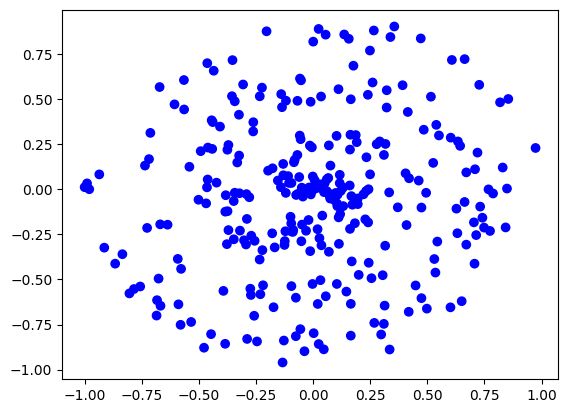

In [15]:
X,y=create_dataset(100,3)

#  plotting the data with matplotlib

# plt.scatter(X[:,0],X[:,1])
plt.scatter(X[:,0],X[:,1],c=y,cmap="brg")
plt.show()

# working with the dataset created above

In [16]:
class LayerDense:
    def __init__(self,n_inputs,n_nuerons ):
        self.weights=0.1*np.random.randn(n_inputs,n_nuerons)
        self.biases=np.ones((1,n_nuerons))
    def forward(self,inputs):
        self.output=np.dot(inputs,self.weights)+self.biases

class ActivationReLU:
    def forward(self,inputs):
        self.output=np.maximum(0,inputs)

layer1=LayerDense(2,5)
activation1=ActivationReLU()
layer1.forward(X)
print("printing output before activation................................................................")
print(layer1.output)

activation1.forward(layer1.output)
print("printing output after activation................................")
print(activation1.output)

printing output before activation................................................................
[[1.         1.         1.         1.         1.        ]
 [0.99916743 0.99892726 0.99993398 1.00011216 1.00207062]
 [0.99925241 0.99907724 1.00097791 1.00129256 1.00168332]
 ...
 [1.00603593 1.01051087 1.07050592 1.0796565  0.97310856]
 [1.00320724 1.00686231 1.07018233 1.07992345 0.9801604 ]
 [1.00514428 1.00940744 1.07159892 1.08111384 0.97512868]]
printing output after activation................................
[[1.         1.         1.         1.         1.        ]
 [0.99916743 0.99892726 0.99993398 1.00011216 1.00207062]
 [0.99925241 0.99907724 1.00097791 1.00129256 1.00168332]
 ...
 [1.00603593 1.01051087 1.07050592 1.0796565  0.97310856]
 [1.00320724 1.00686231 1.07018233 1.07992345 0.9801604 ]
 [1.00514428 1.00940744 1.07159892 1.08111384 0.97512868]]


# Softmax activation function

        input --> Exponentiate --> Normalize --> Output
                \                           /
                 \                         /
                  \                       /
                   -----------------------
                              ↓
                input --> SoftMax --> Output

                        e^z(i,j)
                S(i,j)=----------
                        Σ e^z(i,j)



In [17]:
import math

layer_outputs=[4.8,1.21,2.385,0]
E=math.e

exp_values=[]

for output in layer_outputs:
    exp_values.append(E**output)
print(exp_values)

# Normalizing the values

norm_base=sum(exp_values)
norm_values=[]

for value in exp_values:
    norm_values.append(value/norm_base)
print(norm_values)
print(sum(norm_values))

[121.51041751873483, 3.353484652549023, 10.859062664920513, 1.0]
[0.8887345126278212, 0.024527588738048032, 0.07942383840146965, 0.007314060232661068]
1.0


In [18]:
layer_outputs=[4.8,1.21,2.385,0]

exp_values=np.exp(layer_outputs)

norm_values=exp_values/np.sum(exp_values)

print(exp_values)
print(norm_values)
print(norm_values.sum())


[121.51041752   3.35348465  10.85906266   1.        ]
[0.88873451 0.02452759 0.07942384 0.00731406]
0.9999999999999999


In [27]:
layer_outputs = [[4.8,1.21,2.385],[8.9,-1.01,0.2],[1.41,1.051,0.026]]

exp_values = np.exp(layer_outputs)

print(np.sum(exp_values,axis=1,keepdims=True))


[[ 135.72296484]
 [7333.55916089]
 [   7.98280655]]


In [24]:
exp_values

array([[1.21510418e+02, 3.35348465e+00, 1.08590627e+01],
       [7.33197354e+03, 3.64218980e-01, 1.22140276e+00],
       [4.09595540e+00, 2.86051020e+00, 1.02634095e+00]])

# The problem of overflow
            to solve this problem we subtract all the values with the maximum values which
            cause everything being negative and then maximum is converted to zero .
            this cause all the values ranging between 0 to 1 after being exponentiated.

In [28]:
class LayerDense:
    def __init__(self,n_inputs,n_nuerons ):
        self.weights=0.1*np.random.randn(n_inputs,n_nuerons)
        self.biases=np.ones((1,n_nuerons))
    def forward(self,inputs):
        self.output=np.dot(inputs,self.weights)+self.biases

class ActivationReLU:
    def forward(self,inputs):
        self.output=np.maximum(0,inputs)

class SoftMax:

    def forward(self,inputs):
        exp_value=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
        self.output=exp_value/np.sum(exp_value,axis=1,keepdims=True)


X,y=create_dataset(100,3)

dense1=LayerDense(2,3)
activation1=ActivationReLU()

dense2=LayerDense(3,3)
activation2=SoftMax()

dense1.forward(X)
activation1.forward(dense1.output)
print(activation1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
print(activation2.output)




[[1.         1.         1.        ]
 [0.99986955 1.000395   0.9993095 ]
 [0.99973919 1.00078847 0.99861674]
 [0.9997079  1.00135426 0.9995238 ]
 [0.99950493 1.00132082 0.99697388]
 [0.99943353 1.0023461  0.99843838]
 [0.99969162 1.00212302 1.00107591]
 [0.99922223 1.00174414 0.99449223]
 [0.99908469 1.00375859 0.99740315]
 [0.99908625 1.00177923 0.99291481]
 [0.99871725 1.00368772 0.99276346]
 [0.99989064 0.99811218 0.99436835]
 [0.99957879 0.99899645 0.99258111]
 [0.99862939 1.00283426 0.98974915]
 [0.99850631 1.00314663 0.98896033]
 [0.99823445 1.00432894 0.98833918]
 [0.99877593 1.0012904  0.9880196 ]
 [0.99904862 0.99992661 0.98823752]
 [0.99912038 0.99942401 0.98796759]
 [0.99995251 0.99627268 0.99093351]
 [1.00075945 0.99363848 0.99477008]
 [1.00076186 0.99341888 0.99429937]
 [0.99949227 0.99721364 0.98746684]
 [0.99878815 0.99960466 0.98432987]
 [1.00279838 0.98870477 1.0083856 ]
 [1.00053671 0.99323019 0.99112549]
 [1.00095665 0.99181477 0.99302061]
 [1.00154489 0.9900501  0.99

# Loss functions

        Categorical Cross-Entropy loss function
        


In [60]:
b=0.1
print(np.log(b))

-2.3025850929940455


In [73]:
softmax_output=[0.7,0.2,0.1]

predicted_output=[1,0,0]

# This is the equation which we use for categorical cross entropy loss function
loss=-(math.log(softmax_output[0])*predicted_output[0]+math.log(softmax_output[1])*predicted_output[1]+math.log(softmax_output[2])*predicted_output[2])

print(loss)

#  we can also use this
loss=-(math.log(np.max(softmax_output)))
print(loss)



0.35667494393873245
0.35667494393873245


In [ ]:
!git add .
!git stage .
!git commit -m "started learning loss function"
